In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from extract_features import get_csv

In [3]:
csv_name = "yogawithdrecreated_at869603447.csv"
test_csv = pd.read_csv("~/Desktop/tweet/positive/csv/yogawithdrecreated_at869603447.csv")
test_csv.loc[1:2]

,Unnamed: 0,created_at,emoji_count,emoticon_count,favorite_count,followers_count,friends_count,lang,listed_count,mention_count,retweet_count,text,total_favourites_count
1,1,Wed Oct 28 18:00:05 +0000 2015,0,1,0,204,193,en,44,0,0,yoga is the teacher of yoga yoga is to be unde...,81
2,2,Wed Oct 28 06:35:05 +0000 2015,0,0,0,204,193,en,44,0,0,the whole techniqu of yoga it practic and rest...,81


In [16]:
test_csv.loc[:,['created_at','text']]


,created_at,text
0,Thu Oct 29 15:54:12 +0000 2015,at 14 i was diagnos with attent deficit disord...
1,Wed Oct 28 18:00:05 +0000 2015,yoga is the teacher of yoga yoga is to be unde...
2,Wed Oct 28 06:35:05 +0000 2015,the whole techniqu of yoga it practic and rest...
3,Mon Oct 26 13:55:01 +0000 2015,come get your yoga on with at_us this morn at ...
4,Sun Oct 25 13:27:29 +0000 2015,i sure will miss practic acrobat and sundayfun...
5,Sat Oct 24 13:12:42 +0000 2015,fun way to load onto your base at_us a victori...
6,Fri Oct 23 16:25:56 +0000 2015,i my student at_us green tree yoga medit found...
7,Fri Oct 23 12:49:12 +0000 2015,flashbackfriday fbf to a coupl week ago at con...
8,Fri Oct 23 03:58:31 +0000 2015,anyon who work with me know that be upright is...
9,Thu Oct 22 04:51:45 +0000 2015,hummingbird with at_us and lizzytomb the origi...


In [5]:
import time
import datetime
time_struct2 = time.strptime("Wed Sep 30 13:20:01 +0000 2015","%a %b %d %H:%M:%S +0000 %Y")
time_struct2

time.struct_time(tm_year=2015, tm_mon=9, tm_mday=30, tm_hour=13, tm_min=20, tm_sec=1, tm_wday=2, tm_yday=273, tm_isdst=-1)

[15.]
[15. 18.]
[15. 18.  6.]
[15. 18.  6. 13.]
[15. 18.  6. 13. 13.]
[15. 18.  6. 13. 13. 13.]
[15. 18.  6. 13. 13. 13. 16.]
[15. 18.  6. 13. 13. 13. 16. 12.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21. 17.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21. 17.
 12.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21. 17.
 12. 20.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21. 17.
 12. 20. 15.]
[15. 18.  6. 13. 13. 13. 16. 12

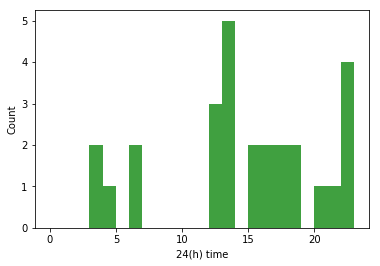

In [6]:
time_list = np.array([])
for time_row in test_csv.created_at:
   
    time_struct = time.strptime(time_row,"%a %b %d %H:%M:%S +0000 %Y")
    
    HMS = int(time.strftime("%H",time_struct))
    
    time_list=np.append(time_list,HMS)
    print(time_list)
plt.hist(time_list,bins=np.arange(0,24,1),facecolor="g",alpha =0.75)
plt.xlabel("24(h) time")
plt.ylabel("Count")
plt.show()

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

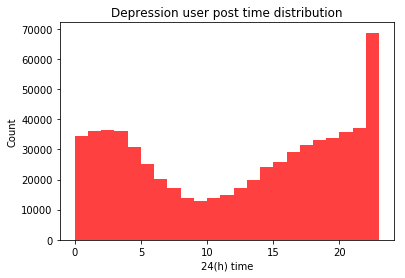

In [12]:
positive_path =get_csv("/Users/charles_tong/Desktop/tweet/positive/csv")
negative_path =get_csv("/Users/charles_tong/Desktop/tweet/negative/csv")
positive_time = np.array([])
for csv_path in positive_path:
    csv = pd.read_csv(csv_path)

    for time_row in csv.created_at:
        time_struct = time.strptime(time_row,"%a %b %d %H:%M:%S +0000 %Y")
        HMS = int(time.strftime("%H",time_struct))
        time_list=np.append(time_list,HMS)
    print(".",end="")
plt.
plt.hist(time_list,bins=np.arange(0,24,1),facecolor="red",alpha =0.75)
plt.title("Depression user post time distribution")
plt.xlabel("24(h) time")
plt.ylabel("Count")
plt.show()

In [14]:
negative_time = np.array([])
for csv_path in negative_path:
    csv = pd.read_csv(csv_path)

    for time_row in csv.created_at:
        time_struct = time.strptime(time_row,"%a %b %d %H:%M:%S +0000 %Y")
        HMS = int(time.strftime("%H",time_struct))
        time_list=np.append(time_list,HMS)
    print(".",end="")
plt.hist(time_list,bins=np.arange(0,24,1),facecolor="blue",alpha =0.75)
plt.title("Normal user post time distribution")
plt.xlabel("24(h) time")
plt.ylabel("Count")
plt.show()

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

KeyboardInterrupt: 